In [134]:
import pandas as pd
import json
import numpy as np
from urllib.error import HTTPError
import matplotlib.pyplot as plt
from config import api_key
import requests
import CordGenerator as cg
from pprint import pprint

In [135]:
url = "http://api.openweathermap.org/data/2.5/find?"
cord_list = cg.random_cords(100)

In [136]:
name = []
lati = []
long = []
temp = []
clouds = []
humidity = []
wind = []

In [137]:
for cord in cord_list:
    lat = cord[0]
    lng = cord[1]
    count = 20
    units = "metric"

    query_url = "lat={}&lon={}&cnt={}&units={}&appid={}".format(lat,lng,count,units,api_key)
    try:
        response = requests.get(url + query_url).json()
    except HTTPError as e:
        print(e.code)
    for cityls in response['list']:
        name.append(cityls['name'])
        lati.append(cityls['coord']['lat'])
        long.append(cityls['coord']['lon'])
        temp.append(cityls['main']['temp_max'])
        clouds.append(cityls['clouds']['all'])
        humidity.append(cityls['main']['humidity'])
        wind.append(cityls['wind']['speed'])

In [138]:
weather_df = pd.DataFrame(columns=['City','Latitude','Longitude','Max temp.','Cloudiness','Humidity','Wind'])
weather_df['City'] = name
weather_df['Latitude'] = lati
weather_df['Longitude'] = long
weather_df['Max temp.'] = temp
weather_df['Cloudiness'] = clouds
weather_df['Humidity'] = humidity
weather_df['Wind'] = wind

print(weather_df.count())
weather_df.head()


City          752
Latitude      752
Longitude     752
Max temp.     752
Cloudiness    752
Humidity      752
Wind          752
dtype: int64


,City,Latitude,Longitude,Max temp.,Cloudiness,Humidity,Wind
0,White Cliffs,-30.8500,143.0833,20.73,56,43,4.66
1,Tibooburra,-29.4334,142.0167,21.23,20,52,1.41
2,Wanaaring,-29.7001,144.1500,22.63,48,45,3.46
3,Bjurholm,63.9303,19.2137,0.00,90,88,5.70
4,Vaennaes,63.9068,19.7571,0.00,90,88,5.70


In [139]:
def plot_it (x_axis, y_data):
    plt.figure(figsize=(8,6))
    plt.suptitle(y_data + "vs " + x_axis + " correlation")
    plt.scatter(weather_df[x_axis], weather_df[y_data])
    plt.xlabel(y_data)
    plt.ylabel(x_axis)

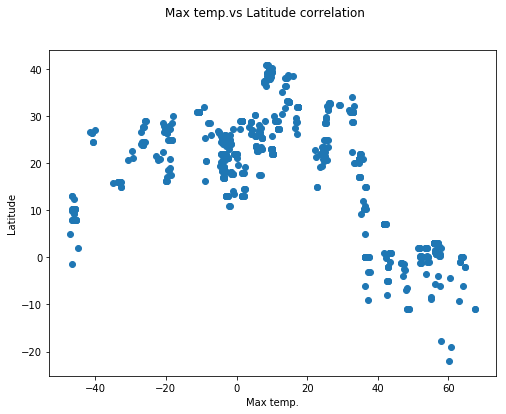

In [140]:
plot_it('Latitude','Max temp.')

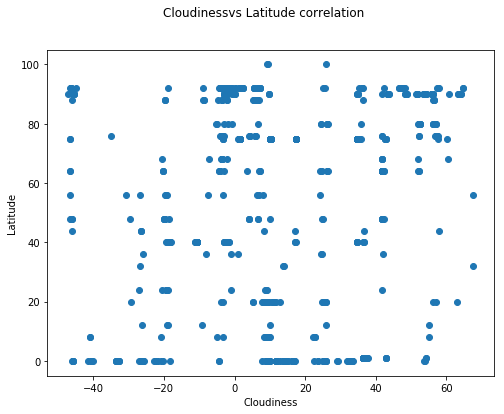

In [141]:
plot_it('Latitude','Cloudiness')

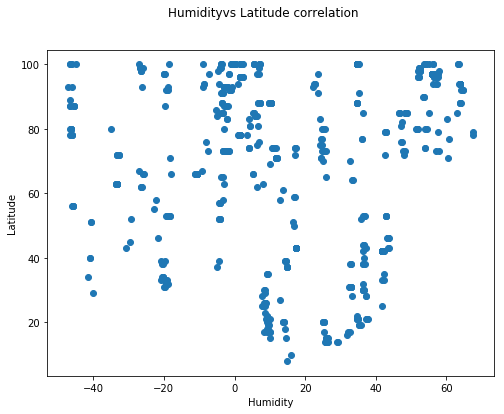

In [144]:
plot_it('Latitude','Humidity')

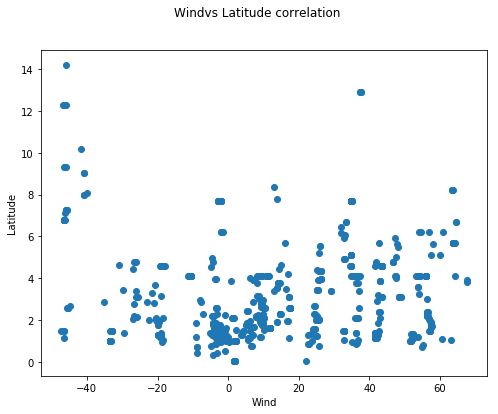

In [143]:
plot_it('Latitude','Wind')